In [1]:
!pip install pandas numpy matplotlib seaborn plotly sklearn statsmodels folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 144.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 125.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 161.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 153.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 170.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.6/500.6 kB 116.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 144.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 179.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 159.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
#!pip install seaborn
import seaborn as sns
import seaborn as sb
#!pip install plotly
import plotly.graph_objects as go
#!pip install folium
#!pip install statsmodels
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import pickle


In [4]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1301,62,male,30.875,3,yes,northwest,46718.16325
88,46,female,27.740,0,no,northwest,8026.66660
807,19,female,36.575,0,no,northwest,2136.88225
551,32,female,28.930,0,no,southeast,3972.92470
1306,29,female,21.850,0,yes,northeast,16115.30450


In [6]:
df.shape

(1338, 7)

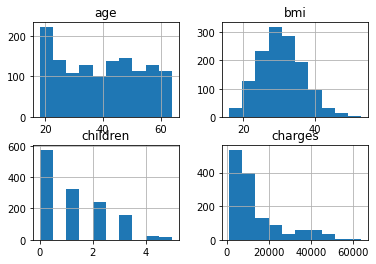

In [7]:
df.hist()
plt.show()

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#df = df.drop_duplicates()

In [5]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df.duplicated().any()

True

<AxesSubplot:>

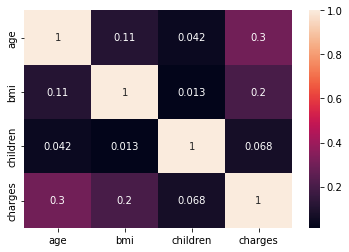

In [10]:
sb.heatmap(df.corr(), annot=True)

In [7]:
df = pd.get_dummies(df, drop_first=True)

In [8]:
x = df.drop("charges", axis=1)
y = df["charges"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

In [10]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print("intercept: ",modelo.intercept_)
print("variables: ",X_train.columns)
print("coeficiente: ",modelo.coef_)

intercept:  -11812.952212787559
variables:  Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
coeficiente:  [  259.28377294   334.33013348   560.38480047  -216.92164981
 24043.57115706  -210.36710762 -1159.01410243  -989.16702841]


In [11]:
Xint = sm.add_constant(X_train)
modelo2 = sm.OLS(y_train, Xint)
results = modelo2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     351.2
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          1.85e-283
Time:                        11:55:40   Log-Likelihood:                -10183.
No. Observations:                1003   AIC:                         2.038e+04
Df Residuals:                     994   BIC:                         2.043e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.181e+04   1164.810    -10.142      0.000   -1.41e+04   -9527.184
age                259.2838     14.094     18.396      0.000     231.626     286.942
bmi                334.3301     33.696      9.922      0.000     268.206     400.454
children           560.3848    161.831      3.463      0.001     242.816     877.954
sex_male          -216.9216    397.204     -0.546      0.585    -996.376     562.532
smoker_yes        2.404e+04    499.031     48.181      0.000    2.31e+04     2.5e+04
region_northwest  -210.3671    567.856     -0.370      0.711   -1324.700     903.966
region_southeast -1159.0141    572.395     -2.025      0.043   -2282.255     -35.773
region_southwest  -989.1670    558.264     -1.772      0.077   -2084.678     106.343
==============================================================================
Omnibus:                      231.741   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.491
Skew:                           1.239   Prob(JB):                    3.53e-119
Kurtosis:                       5.629   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y_pred = modelo.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('RMSE', metrics.mean_squared_error(y_test, y_pred,squared=False))

MAE: 4023.6471495940405
MSE: 30723136.826880053
RMSE: 5542.845553222645


In [13]:
Xint = sm.add_constant(X_train)
modelo3 = sm.OLS(y_train, X_train)
results = modelo3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              830.5
Date:                Sun, 14 Aug 2022   Prob (F-statistic):                        0.00
Time:                        11:55:45   Log-Likelihood:                         -10232.
No. Observations:                1003   AIC:                                  2.048e+04
Df Residuals:                     995   BIC:                                  2.052e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                204.5860     13.672     14.964      0.000     177.757     231.415
bmi                 69.2103     22.323      3.100      0.002      25.406     113.015
children           371.7743    168.786      2.203      0.028      40.557     702.992
sex_male          -742.3549    413.475     -1.795      0.073   -1553.738      69.028
smoker_yes        2.358e+04    521.745     45.194      0.000    2.26e+04    2.46e+04
region_northwest -1506.0433    580.925     -2.592      0.010   -2646.023    -366.064
region_southeast -1399.7751    600.460     -2.331      0.020   -2578.088    -221.462
region_southwest -1925.5275    578.068     -3.331      0.001   -3059.901    -791.154
==============================================================================
Omnibus:                      212.483   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.188
Skew:                           1.145   Prob(JB):                    1.33e-107
Kurtosis:                       5.556   Cond. No.                         206.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
modelo4 = LinearRegression(fit_intercept=False)
modelo4.fit(X_train, y_train)
print("intercept: ",modelo4.intercept_)
print("variables: ",X_train.columns)
print("coeficiente: ",modelo4.coef_)

intercept:  0.0
variables:  Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
coeficiente:  [  204.58595225    69.21025209   371.7742913   -742.35489543
 23579.74455128 -1506.04330995 -1399.77505837 -1925.52747762]


In [15]:
print("Modelo con constante")
y_pred = modelo.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Modelo sin constante")
y_pred_sin_int = modelo4.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_sin_int))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_sin_int))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_sin_int)))

Modelo con constante
MAE: 4023.6471495940405
MSE: 30723136.826880053
RMSE: 5542.845553222645
Modelo sin constante
MAE: 4278.042622074817
MSE: 34870064.92980866
RMSE: 5905.088054365376


In [16]:
poly_feature = PolynomialFeatures(degree=2)
x_poly_train = poly_feature.fit_transform(X_train)
x_poly_test = poly_feature.fit_transform(X_test)
modelo5 = modelo.fit(x_poly_train, y_train)


In [17]:
y_pred_poly = modelo5.predict(x_poly_test)
print("Modelo de segundo grado")
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_poly))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_poly))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

Modelo de segundo grado
MAE: 3794.6198658238804
MSE: 27793221.25291654
RMSE: 5271.927660061027


In [ ]:
# Save model in models folder

filename='../models/final_model.sav'
pickle.dump(modelo3, open(filename, 'wb'))